# Clustering Notebook - Attacking the US Opioid Epidemic
## Joseph Blankenship and Jacob Mitchell
In this Notebook, we take our gathered data and put it into clusters to see if we can find any patterns or relationships in our data. We will do this for each year of gathered data (2017, 2018, and 2019) and see if the relationships strongly hold for each year.

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import linear_model # Scikit-Learn - https://scikit-learn.org/ 
from pandas.plotting import andrews_curves

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [449]:
stats2018 = pd.read_csv("totals2018")
state_list = stats2018['State Name']
#I just input this here to make a list of state names for later use.

# Clustering for 2017 Data
## Inintially, we will be making clusters of a lot of different factors that may have an impact on opioid misuse. 
We will be dropping and storing the number of deaths and the death rate to see if the clusters formed will have a direct impact on the number of deaths or the death rate. 

In [314]:
stats2017 = pd.read_csv("totals2017.csv")
stats2017
numdeaths2017 = stats2017['2017_num_deaths']
normDR2017 = stats2017['Normalized_Death_Rate']

In [392]:
numdeaths2017 = numdeaths2017.replace(',','', regex=True)

In [321]:
#Dropping these columns since they're non numerical
stats2017 = stats2017.drop(columns=['State Name', 'Unnamed: 0', 'range_category', '2017_num_deaths', 'Normalized_Death_Rate'])

In [322]:
stats2017.columns

Index(['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2017_age_adjusted_rate',
       'Normalized_Long-Acting_Rate', 'Normalized_Tot_Opioid_Clms',
       'SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [323]:
stats2017 = stats2017.replace(',','', regex=True)

In [324]:
kmeans = KMeans(n_clusters=8).fit(stats2017.values)
print(kmeans, "\n")

KMeans() 



In [325]:
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([10,  2,  7,  1,  4,  3, 16,  7]))


In [326]:
#print(kmeans.cluster_centers_)

In [327]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
#print(kmeans_3)

In [328]:
pca = PCA(n_components=2).fit(stats2017)

# Perform the transform
pca_trans = pca.transform(stats2017)

pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
5,0,-1.234543e+07,-203535.604179
18,6,-2.235779e+07,109859.556077
7,6,-2.525325e+07,104144.482033
43,6,-2.146956e+07,-65584.046376
13,7,5.049932e+06,-261176.837296


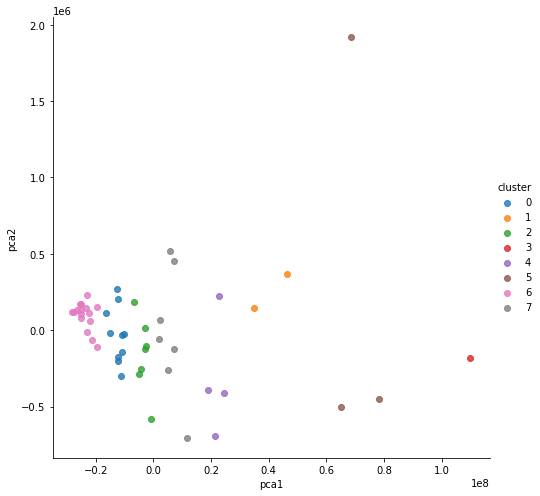

In [329]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1.29361028167901e+16
Obj. Func: 5644726174373743.0
Obj. Func: 3150465646921233.0
Obj. Func: 1998649634467750.0
Obj. Func: 1148663825461878.8
Obj. Func: 654014385260075.4
Obj. Func: 405575989554671.8
Obj. Func: 317139891486455.7
Obj. Func: 251607928201552.6


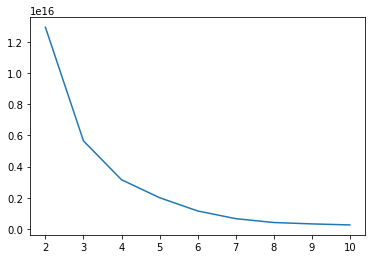

In [330]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(stats2017.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

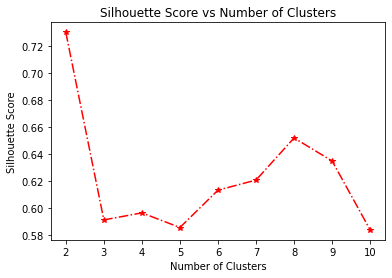

In [331]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(stats2017.values) for k in k_range]
sscores = [silhouette_score(stats2017.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [332]:
clusterResults2017 = pd.concat([kmeans_3, stats2017], axis=1, join='outer')
clusterResults2017['State'] = state_list
clusterResults2017['Num Deaths'] = numdeaths2017
clusterResults2017['Norm Death Rate'] = normDR2017
#clusterResults2017

In [333]:
clusterResults2017.groupby(["cluster", "State", "Norm Death Rate"]).mean()

pca1          pca2    Year  \
cluster State          Norm Death Rate                                       
0       Arkansas       14.860004       -1.104735e+07 -1.403483e+05  2017.0   
        Colorado       18.086614       -1.234543e+07 -2.035356e+05  2017.0   
        Connecticut    30.000305       -1.267082e+07  2.723687e+05  2017.0   
        Iowa           5.121598        -1.240772e+07  2.019523e+05  2017.0   
        Kansas         10.599863       -1.508734e+07 -1.836402e+04  2017.0   
        Maryland       168.363539      -1.015031e+07 -2.199101e+04  2017.0   
        Mississippi    6.359780        -1.078114e+07 -3.058973e+04  2017.0   
        Oklahoma       6.646855        -1.137513e+07 -2.976109e+05  2017.0   
        Oregon         13.481491       -1.230731e+07 -1.763718e+05  2017.0   
        West Virginia  13.120740       -1.651376e+07  1.115704e+05  2017.0   
1       Ohio           677.005651       3.503201e+07  1.432448e+05  2017.0   
        Pennsylvania   130.031072       4.647206e+07  3.690971e+05  2017.0   
2       Alabama        17.130011       -7.855179e+05 -5.846632e+05  2017.0   
        Arizona        21.748982       -4.204681e+06 -2.512253e+05  2017.0   
        Louisiana      24.886193       -2.470408e+06 -1.015424e+05  2017.0   
        Minnesota      7.349761        -6.826667e+06  1.855715e+05  2017.0   
        South Carolina 95.484113       -2.924648e+06 -1.225090e+05  2017.0   
        Washington     13.812111       -4.975288e+06 -2.879723e+05  2017.0   
        Wisconsin      64.776963       -2.985551e+06  1.452505e+04  2017.0   
3       California     12.368358        1.099097e+08 -1.849775e+05  2017.0   
4       Georgia        7.331751         1.906613e+07 -3.906019e+05  2017.0   
        Illinois       161.726480       2.277460e+07  2.234841e+05  2017.0   
        Michigan       39.272345        2.142064e+07 -6.920800e+05  2017.0   
        North Carolina 12.322883        2.456878e+07 -4.119513e+05  2017.0   
5       Florida        732.185360       7.835324e+07 -4.528908e+05  2017.0   
        New York       187.447652       6.865034e+07  1.917243e+06  2017.0   
        Texas          44.553429        6.517625e+07 -5.036960e+05  2017.0   
6       Alaska         19.872921       -2.807868e+07  1.180649e+05  2017.0   
        Delaware       35.325238       -2.525325e+07  1.041445e+05  2017.0   
        Hawaii         1.949986        -2.527765e+07  1.725956e+05  2017.0   
        Idaho          16.568461       -2.302317e+07 -1.075216e+04  2017.0   
        Maine          9.078141        -2.235779e+07  1.098596e+05  2017.0   
        Montana        1.948689        -2.503764e+07  8.196071e+04  2017.0   
        Nebraska       14.442052       -1.956415e+07  1.543157e+05  2017.0   
        Nevada         35.282813       -1.967071e+07 -1.106737e+05  2017.0   
        New Hampshire  15.724409       -2.351777e+07  1.427094e+05  2017.0   
        New Mexico     5.548350        -2.187447e+07  6.059573e+04  2017.0   
        North Dakota   0.662237        -2.552054e+07  1.683931e+05  2017.0   
        Rhode Island   2.502416        -2.300688e+07  2.291464e+05  2017.0   
        South Dakota   1.453816        -2.502617e+07  1.347728e+05  2017.0   
        Utah           2.297203        -2.146956e+07 -6.558405e+04  2017.0   
        Vermont        4.321128        -2.657788e+07  1.333122e+05  2017.0   
        Wyoming        1.191672        -2.747511e+07  1.219654e+05  2017.0   
7       Indiana        14.492722        5.049932e+06 -2.611768e+05  2017.0   
        Kentucky       53.838151        1.762328e+06 -5.983215e+04  2017.0   
        Massachusetts  35.990164        5.714040e+06  5.182210e+05  2017.0   
        Missouri       45.741858        7.308580e+06 -1.203811e+05  2017.0   
        New Jersey     199.067755       7.266860e+06  4.518065e+05  2017.0   
        Tennessee      203.467191       1.178704e+07 -7.047104e+05  2017.0   
        Virginia       241.373345       2.277989e+06  6.511055e+04  20

In [334]:
clusterResults2017.groupby(["cluster", "State", "Num Deaths"]).mean()

pca1          pca2    Year  \
cluster State          Num Deaths                                       
0       Arkansas       446        -1.104735e+07 -1.403483e+05  2017.0   
        Colorado       1,015      -1.234543e+07 -2.035356e+05  2017.0   
        Connecticut    1,072      -1.267082e+07  2.723687e+05  2017.0   
        Iowa           341        -1.240772e+07  2.019523e+05  2017.0   
        Kansas         333        -1.508734e+07 -1.836402e+04  2017.0   
        Maryland       2,247      -1.015031e+07 -2.199101e+04  2017.0   
        Mississippi    354        -1.078114e+07 -3.058973e+04  2017.0   
        Oklahoma       775        -1.137513e+07 -2.976109e+05  2017.0   
        Oregon         530        -1.230731e+07 -1.763718e+05  2017.0   
        West Virginia  974        -1.651376e+07  1.115704e+05  2017.0   
1       Ohio           5,111       3.503201e+07  1.432448e+05  2017.0   
        Pennsylvania   5,388       4.647206e+07  3.690971e+05  2017.0   
2       Alabama        835        -7.855179e+05 -5.846632e+05  2017.0   
        Arizona        1,532      -4.204681e+06 -2.512253e+05  2017.0   
        Louisiana      1,108      -2.470408e+06 -1.015424e+05  2017.0   
        Minnesota      733        -6.826667e+06  1.855715e+05  2017.0   
        South Carolina 1,008      -2.924648e+06 -1.225090e+05  2017.0   
        Washington     1,169      -4.975288e+06 -2.879723e+05  2017.0   
        Wisconsin      1,177      -2.985551e+06  1.452505e+04  2017.0   
3       California     4,868       1.099097e+08 -1.849775e+05  2017.0   
4       Georgia        1,537       1.906613e+07 -3.906019e+05  2017.0   
        Illinois       2,778       2.277460e+07  2.234841e+05  2017.0   
        Michigan       2,694       2.142064e+07 -6.920800e+05  2017.0   
        North Carolina 2,414       2.456878e+07 -4.119513e+05  2017.0   
5       Florida        5,088       7.835324e+07 -4.528908e+05  2017.0   
        New York       3,921       6.865034e+07  1.917243e+06  2017.0   
        Texas          2,989       6.517625e+07 -5.036960e+05  2017.0   
6       Alaska         147        -2.807868e+07  1.180649e+05  2017.0   
        Delaware       338        -2.525325e+07  1.041445e+05  2017.0   
        Hawaii         203        -2.527765e+07  1.725956e+05  2017.0   
        Idaho          236        -2.302317e+07 -1.075216e+04  2017.0   
        Maine          424        -2.235779e+07  1.098596e+05  2017.0   
        Montana        119        -2.503764e+07  8.196071e+04  2017.0   
        Nebraska       152        -1.956415e+07  1.543157e+05  2017.0   
        Nevada         676        -1.967071e+07 -1.106737e+05  2017.0   
        New Hampshire  467        -2.351777e+07  1.427094e+05  2017.0   
        New Mexico     493        -2.187447e+07  6.059573e+04  2017.0   
        North Dakota   68         -2.552054e+07  1.683931e+05  2017.0   
        Rhode Island   320        -2.300688e+07  2.291464e+05  2017.0   
        South Dakota   73         -2.502617e+07  1.347728e+05  2017.0   
        Utah           650        -2.146956e+07 -6.558405e+04  2017.0   
        Vermont        134        -2.657788e+07  1.333122e+05  2017.0   
        Wyoming        69         -2.747511e+07  1.219654e+05  2017.0   
7       Indiana        1,852       5.049932e+06 -2.611768e+05  2017.0   
        Kentucky       1,566       1.762328e+06 -5.983215e+04  2017.0   
        Massachusetts  2,168       5.714040e+06  5.182210e+05  2017.0   
        Missouri       1,367       7.308580e+06 -1.203811e+05  2017.0   
        New Jersey     2,685       7.266860e+06  4.518065e+05  2017.0   
        Tennessee      1,776       1.178704e+07 -7.047104e+05  2017.0   
        Virginia       1,507       2.277989e+06  6.511055e+04  2017.0   

                                   Tot_Prscrbrs  Tot_Opioid_Prscrbrs  \
cluster State          Num Deaths                                      
0       Arkansas       446               8989.0               7079.0   
        Colorado       1,015  

<AxesSubplot:>

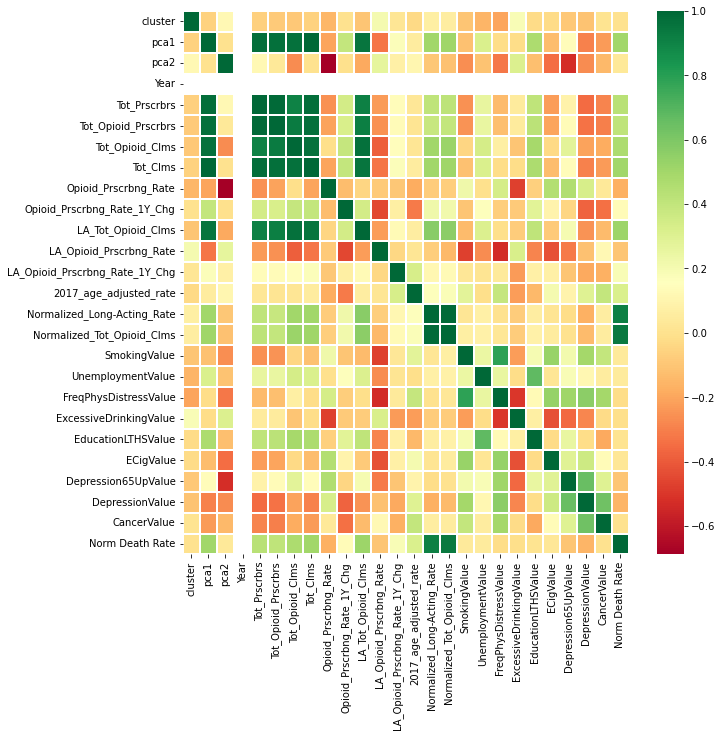

In [335]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(clusterResults2017.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = False, ax=ax)

## Clustering a smaller amount of 2017 data

In [336]:
small2017 = pd.read_csv("normState_2017.csv")
small2017 = small2017.drop(columns=['state', 'Year', 'state.1', 'Breakout_Type', 'Breakout', 'range_category', 'Prscrbr_Geo_Lvl', 'RUCA_Cd', 'Prscrbr_Geo_Cd', 'Opioid_Prscrbng_Rate_5Y_Chg', 'LA_Opioid_Prscrbng_Rate_5Y_Chg', '2017_num_deaths', 'Normalized_Death_Rate'])
small2017 = small2017.replace(',','', regex=True)
small2017

,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_1Y_Chg,2017_age_adjusted_rate,Normalized_Long-Acting_Rate,Normalized_Tot_Opioid_Clms
0,14415.0,9932.0,2051853.0,28457799.0,7.21,-0.26,191462.0,9.33,-0.63,18.0,3927.839776,42093.730498
1,2461.0,1831.0,78398.0,1227513.0,6.39,-0.55,15157.0,19.33,0.04,20.2,2049.073949,10598.621063
2,22950.0,17110.0,1552551.0,25057852.0,6.20,-0.39,244929.0,15.78,-0.58,22.2,3477.125523,22040.733060
3,8989.0,7079.0,1130357.0,18228050.0,6.20,-0.19,107547.0,9.51,-0.29,15.5,3583.293490,37661.681679
4,119832.0,83794.0,6809889.0,139049933.0,4.90,-0.17,807153.0,11.85,-0.52,11.7,2050.771908,17302.207958
5,20053.0,15291.0,1127939.0,16928325.0,6.66,-0.45,171282.0,15.19,-0.77,17.6,3052.129543,20099.111083
6,17452.0,11657.0,641082.0,16625633.0,3.86,-0.28,102513.0,15.99,-0.76,30.9,2868.863126,17940.910034
7,3525.0,2612.0,222382.0,4049166.0,5.49,-0.52,43674.0,19.64,0.52,37.0,4564.480578,23241.707191
8,70945.0,44994.0,5563661.0,107515188.0,5.17,-0.04,775968.0,13.95,-0.32,25.1,111665.174858,800635.049920
9,29439.0,21545.0,2783756.0,48296702.0,5.76,-0.21,296460.0,10.65,0.08,14.7,1414.164629,13278.989647


In [338]:
kmeans = KMeans(n_clusters=8).fit(small2017.values)

In [339]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [340]:
pca = PCA(n_components=2).fit(small2017)
# Perform the transform
pca_trans = pca.transform(small2017)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
33,2,-2.552054e+07,168393.141804
22,1,-6.826667e+06,185571.496457
41,6,1.178704e+07,-704710.449925
27,2,-1.967071e+07,-110673.704206
44,2,-2.657788e+07,133312.246485


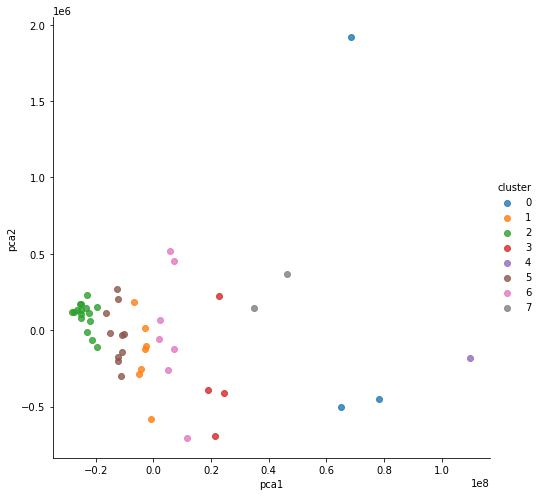

In [341]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1.2936102816787756e+16
Obj. Func: 5644726174371531.0
Obj. Func: 3150465646919047.0
Obj. Func: 1998649634465590.0
Obj. Func: 1151975533336084.8
Obj. Func: 654014385258030.5
Obj. Func: 405575989552643.8
Obj. Func: 317139891484444.4
Obj. Func: 245878635068316.8


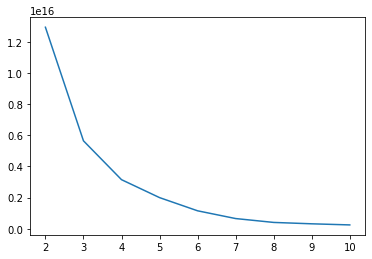

In [342]:
clusterRange = range(2,11)
objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(small2017.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)
plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

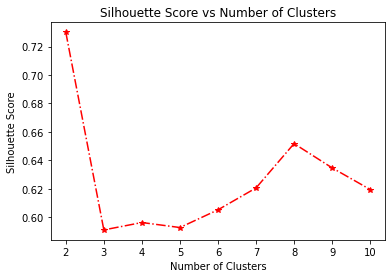

In [343]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(small2017.values) for k in k_range]
sscores = [silhouette_score(small2017.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

It seems consistent that the number of clusters in these examples is 8

In [351]:
clusterResults2017small = pd.concat([kmeans_3, small2017], axis=1, join='outer')
clusterResults2017small['Location'] = state_list
clusterResults2017small['Normalized_Death_Rate'] = normDR2017
clusterResults2017small['Num Deaths'] = numdeaths2017
clusterResults2017small.groupby(["cluster", "Location", 'Num Deaths']).mean()

pca1          pca2  Tot_Prscrbrs  \
cluster Location       Num Deaths                                             
0       Florida        5,088       7.835324e+07 -4.528908e+05       70945.0   
        New York       3,921       6.865034e+07  1.917243e+06       92524.0   
        Texas          2,989       6.517625e+07 -5.036960e+05       73744.0   
1       Alabama        835        -7.855179e+05 -5.846632e+05       14415.0   
        Arizona        1,532      -4.204681e+06 -2.512253e+05       22950.0   
        Louisiana      1,108      -2.470408e+06 -1.015424e+05       16606.0   
        Minnesota      733        -6.826667e+06  1.855715e+05       22141.0   
        South Carolina 1,008      -2.924648e+06 -1.225090e+05       15773.0   
        Washington     1,169      -4.975288e+06 -2.879723e+05       26755.0   
        Wisconsin      1,177      -2.985551e+06  1.452505e+04       21560.0   
2       Alaska         147        -2.807868e+07  1.180649e+05        2461.0   
        Delaware       338        -2.525325e+07  1.041445e+05        3525.0   
        Hawaii         203        -2.527765e+07  1.725956e+05        4278.0   
        Idaho          236        -2.302317e+07 -1.075216e+04        5313.0   
        Maine          424        -2.235779e+07  1.098596e+05        6115.0   
        Montana        119        -2.503764e+07  8.196071e+04        3914.0   
        Nebraska       152        -1.956415e+07  1.543157e+05        7066.0   
        Nevada         676        -1.967071e+07 -1.106737e+05        7913.0   
        New Hampshire  467        -2.351777e+07  1.427094e+05        5989.0   
        New Mexico     493        -2.187447e+07  6.059573e+04        7351.0   
        North Dakota   68         -2.552054e+07  1.683931e+05        2942.0   
        Rhode Island   320        -2.300688e+07  2.291464e+05        4960.0   
        South Dakota   73         -2.502617e+07  1.347728e+05        3341.0   
        Utah           650        -2.146956e+07 -6.558405e+04        8756.0   
        Vermont        134        -2.657788e+07  1.333122e+05        2739.0   
        Wyoming        69         -2.747511e+07  1.219654e+05        1817.0   
3       Georgia        1,537       1.906613e+07 -3.906019e+05       29439.0   
        Illinois       2,778       2.277460e+07  2.234841e+05       46798.0   
        Michigan       2,694       2.142064e+07 -6.920800e+05       41803.0   
        North Carolina 2,414       2.456878e+07 -4.119513e+05       35629.0   
4       California     4,868       1.099097e+08 -1.849775e+05      119832.0   
5       Arkansas       446        -1.104735e+07 -1.403483e+05        8989.0   
        Colorado       1,015      -1.234543e+07 -2.035356e+05       20053.0   
        Connecticut    1,072      -1.267082e+07  2.723687e+05       17452.0   
        Iowa           341        -1.240772e+07  2.019523e+05       10773.0   
        Kansas         333        -1.508734e+07 -1.836402e+04       10019.0   
        Maryland       2,247      -1.015031e+07 -2.199101e+04       23213.0   
        Mississippi    354        -1.078114e+07 -3.058973e+04        9151.0   
        Oklahoma       775        -1.137513e+07 -2.976109e+05       12041.0   
        Oregon         530        -1.230731e+07 -1.763718e+05       16408.0   
        West Virginia  974        -1.651376e+07  1.115704e+05        7363.0   
6       Indiana        1,852       5.049932e+06 -2.611768e+05       21829.0   
        Kentucky       1,566       1.762328e+06 -5.983215e+04       16154.0   
        Massachusetts  2,168       5.714040e+06  5.182210e+05       35678.0   
        Missouri       1,367       7.308580e+06 -1.203811e+05       21675.0   
        New Jersey     2,685       7.266860e+06  4.518065e+05       31575.0   
        Tennessee      1,776       1.178704e+07 -7.047104e+05       24842.0   
        Virginia       1,507       2.277989e+06  6.511055e+04       26554.0   
7       Ohio           5,111       3.503201e+07  1.432448e+05       45376.0   
        Pennsy

### Discussion of Clustering Results
1. It seems that these predictors have formed clusters in a way in which the number of deaths in the state is all similar despite not being clustered with this data. This is awesome, as it implies these predictors may actually be good ones! It however does not have a lot of consistency in predicting the normalized death rate.
2. The death rate was highly correlated with the prescription rates, so maybe I should take those out as well and see if these predictors still do an ok job at predicting or grouping the death rates.
3. The smaller dataset didn't seem to make any difference so the work going forward is all going to be done with the larger dataset. 
4. The clusters that did form seem to group Ohio and Pennsylvania together, midwestern states together, I wonder if geography has something to do with it

### Removing the prescriptions to see how that impacts our clusters

In [376]:
smaller2017.columns

Index(['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2017_age_adjusted_rate',
       'Normalized_Long-Acting_Rate', 'Normalized_Tot_Opioid_Clms',
       'SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [377]:
smaller2017 = stats2017
#smaller2017 = stats2017.drop(columns=['state', 'Year', 'state.1', 'Breakout_Type', 'Breakout', 'range_category', 'Prscrbr_Geo_Lvl', 'RUCA_Cd', 'Prscrbr_Geo_Cd', 'Opioid_Prscrbng_Rate_5Y_Chg', 'LA_Opioid_Prscrbng_Rate_5Y_Chg', '2017_num_deaths', 'Normalized_Death_Rate'])
#smaller2017 = small2017.replace(',','', regex=True)
normLA2017 = stats2017['Normalized_Long-Acting_Rate']
normTotClms2017 = stats2017['Normalized_Tot_Opioid_Clms']
smaller2017 = smaller2017.drop(columns=['Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms', 'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg', 'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate_1Y_Chg', 'Normalized_Tot_Opioid_Clms', 'Normalized_Long-Acting_Rate'])

In [384]:
kmeans = KMeans(n_clusters=3).fit(smaller2017.values)

In [385]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [386]:
pca = PCA(n_components=2).fit(smaller2017)
# Perform the transform
pca_trans = pca.transform(smaller2017)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
20,0,8.111211,7.072444
8,0,2.019021,2.088976
0,0,-2.986644,-7.901903
25,1,-10.667560,-0.613693
48,0,-2.303650,3.099155


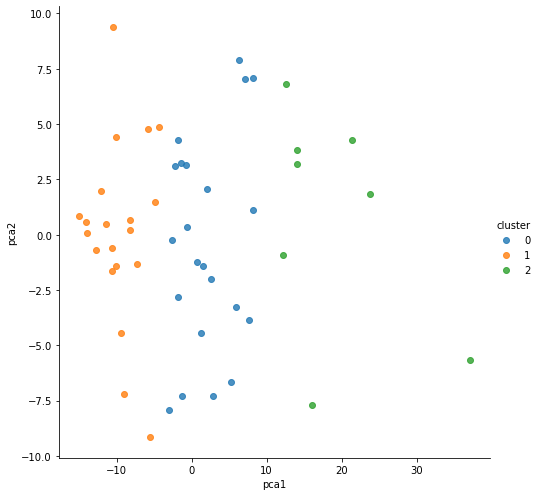

In [387]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 4265.095428571429
Obj. Func: 3199.757954545455
Obj. Func: 2592.822631578947
Obj. Func: 2259.411416666667
Obj. Func: 2037.7395396825398
Obj. Func: 1834.3744220779222
Obj. Func: 1711.472130952381
Obj. Func: 1482.2721309523806
Obj. Func: 1315.6444999999997


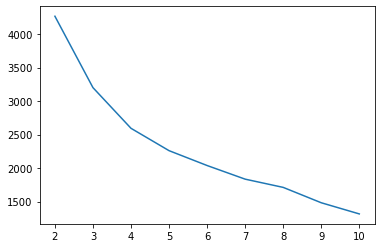

In [388]:
clusterRange = range(2,11)
objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smaller2017.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)
plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

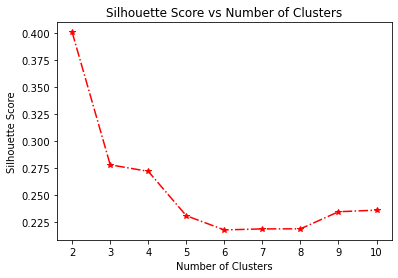

In [389]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smaller2017.values) for k in k_range]
sscores = [silhouette_score(smaller2017.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [417]:
clusterResults2017smaller = pd.concat([kmeans_3, smaller2017], axis=1, join='outer')
clusterResults2017smaller['Location'] = state_list
clusterResults2017smaller['Normalized_Death_Rate'] = normDR2017
clusterResults2017smaller['NumDeaths'] = numdeaths2017

clusterResults2017smaller.groupby(["cluster", "Location"]).NumDeaths.mean()
#clusterResults2017smaller['NumDeaths']=clusterResults2017smaller['NumDeaths'].astype(int)
#clusterResults2017smaller.groupby(["cluster"]).NumDeaths.var()


cluster  Location      
0        Alabama            835.0
         Alaska             147.0
         Arizona           1532.0
         Connecticut       1072.0
         Florida           5088.0
         Illinois          2778.0
         Indiana           1852.0
         Louisiana         1108.0
         Massachusetts     2168.0
         Michigan          2694.0
         Missouri          1367.0
         Nevada             676.0
         New Jersey        2685.0
         New Mexico         493.0
         New York          3921.0
         North Carolina    2414.0
         Oklahoma           775.0
         Rhode Island       320.0
         South Carolina    1008.0
         Tennessee         1776.0
         Utah               650.0
         Vermont            134.0
         Wisconsin         1177.0
1        Delaware           338.0
         Kentucky          1566.0
         Maine              424.0
         Maryland          2247.0
         New Hampshire      467.0
         Ohio           

<AxesSubplot:>

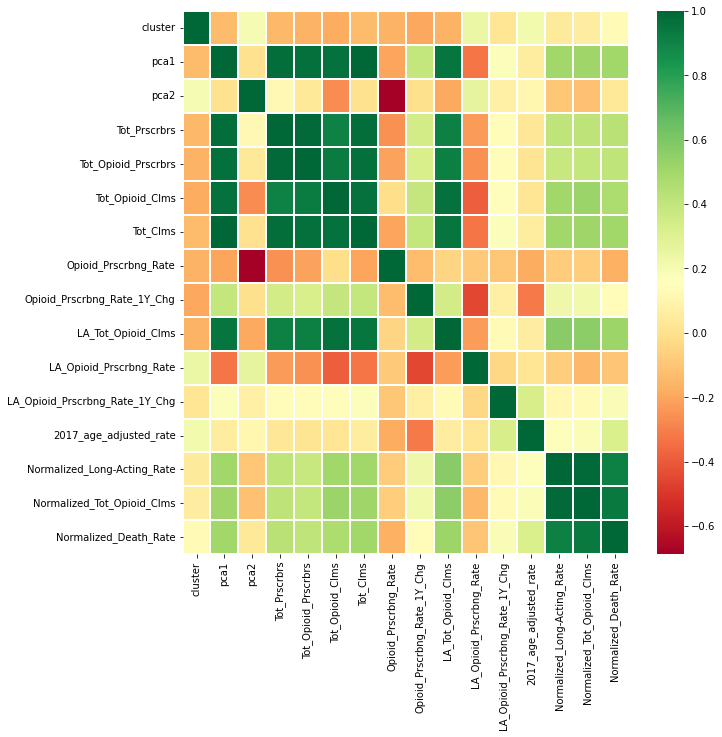

In [436]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(clusterResults2017prescrip.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = False, ax=ax)

### Discussion 
Removing data about the prescriptions actually decreases the number of clusters and less accurately clusters by death rate. Interestingly, the clusters sort of merged into one another. What if we take away more predictors?

### Removing more predictors

In [408]:
smallest2017 = smaller2017
#smaller2017 = stats2017.drop(columns=['state', 'Year', 'state.1', 'Breakout_Type', 'Breakout', 'range_category', 'Prscrbr_Geo_Lvl', 'RUCA_Cd', 'Prscrbr_Geo_Cd', 'Opioid_Prscrbng_Rate_5Y_Chg', 'LA_Opioid_Prscrbng_Rate_5Y_Chg', '2017_num_deaths', 'Normalized_Death_Rate'])
#smaller2017 = small2017.replace(',','', regex=True)
smallest2017 = smallest2017.drop(columns=['CancerValue', 'Depression65UpValue', 'ECigValue'])

In [410]:
kmeans = KMeans(n_clusters=3).fit(smallest2017.values)

In [411]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [412]:
pca = PCA(n_components=2).fit(smallest2017)
# Perform the transform
pca_trans = pca.transform(smallest2017)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
19,1,12.730303,-6.448931
34,1,23.807734,-0.784568
13,0,7.535775,4.121148
46,2,-7.371441,-0.378955
48,0,-2.246320,-2.519493


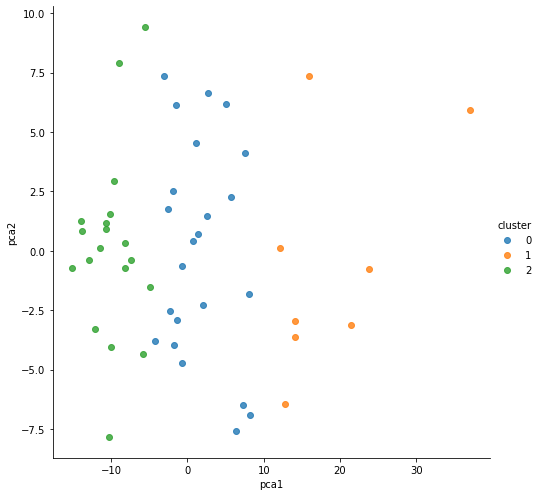

In [413]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 3927.5335238095226
Obj. Func: 2878.576833524027
Obj. Func: 2290.881722222222
Obj. Func: 2023.4405833333333
Obj. Func: 1749.4486742424242
Obj. Func: 1580.3405663780668
Obj. Func: 1386.6131538461539
Obj. Func: 1293.2290000000003
Obj. Func: 1159.2573484848488


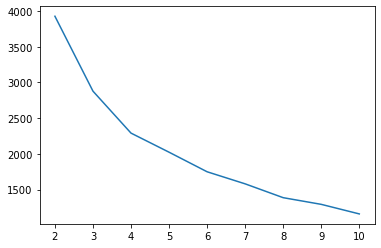

In [414]:
clusterRange = range(2,11)
objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smallest2017.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)
plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

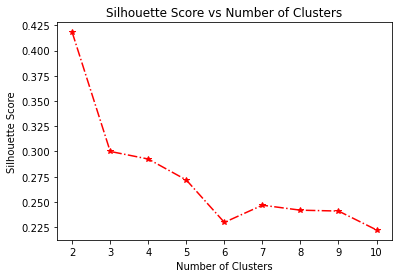

In [415]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smallest2017.values) for k in k_range]
sscores = [silhouette_score(smallest2017.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

3 proves to be an appropriate number of clusters for this smaller dataset

In [416]:
clusterResults2017smallest = pd.concat([kmeans_3, smallest2017], axis=1, join='outer')
clusterResults2017smallest['Location'] = state_list
clusterResults2017smallest['Normalized_Death_Rate'] = normDR2017
clusterResults2017smallest['NumDeaths'] = numdeaths2017

clusterResults2017smallest.groupby(["cluster", "Location"]).NumDeaths.mean()

cluster  Location      
0        Alabama            835.0
         Alaska             147.0
         Arizona           1532.0
         Connecticut       1072.0
         Florida           5088.0
         Illinois          2778.0
         Indiana           1852.0
         Louisiana         1108.0
         Massachusetts     2168.0
         Michigan          2694.0
         Missouri          1367.0
         Nevada             676.0
         New Jersey        2685.0
         New Mexico         493.0
         New York          3921.0
         North Carolina    2414.0
         Oklahoma           775.0
         Rhode Island       320.0
         South Carolina    1008.0
         Tennessee         1776.0
         Utah               650.0
         Vermont            134.0
         Wisconsin         1177.0
1        Delaware           338.0
         Kentucky          1566.0
         Maine              424.0
         Maryland          2247.0
         New Hampshire      467.0
         Ohio           

### Discussion
It seems that these predictors may be okay in predicting number of deaths, but even more accurate alongside the presciption rates. This clustering seems to make groups of small, medium, and large death numbers. However, there are very obvious outliers. How about if I only include prescriptions as a predictor?

In [419]:
prescriptionCluster = small2017

In [426]:
kmeans = KMeans(n_clusters=8).fit(prescriptionCluster.values)

In [427]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [428]:
pca = PCA(n_components=2).fit(prescriptionCluster)
# Perform the transform
pca_trans = pca.transform(prescriptionCluster)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
5,1,-1.234543e+07,-203535.604213
6,1,-1.267082e+07,272368.737335
19,1,-1.015031e+07,-21991.012308
22,3,-6.826667e+06,185571.496457
23,1,-1.078114e+07,-30589.733750


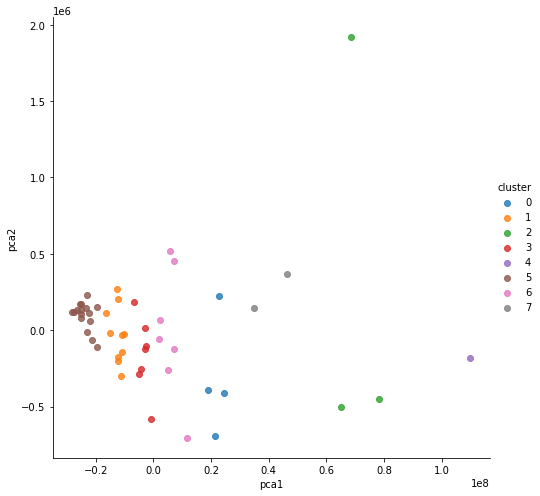

In [429]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1.2936102816787756e+16
Obj. Func: 5644726174371531.0
Obj. Func: 3150465646919047.0
Obj. Func: 1998649634465590.0
Obj. Func: 1148663825459830.2
Obj. Func: 654014385258030.5
Obj. Func: 412956451532787.7
Obj. Func: 317139891484444.4
Obj. Func: 251215465077479.8


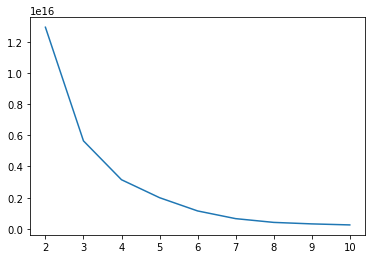

In [430]:
clusterRange = range(2,11)
objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(prescriptionCluster.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)
plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

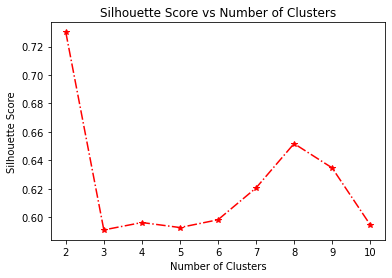

In [431]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(prescriptionCluster.values) for k in k_range]
sscores = [silhouette_score(prescriptionCluster.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [432]:
clusterResults2017prescrip = pd.concat([kmeans_3, prescriptionCluster], axis=1, join='outer')
clusterResults2017prescrip['Location'] = state_list
clusterResults2017prescrip['Normalized_Death_Rate'] = normDR2017
clusterResults2017prescrip['NumDeaths'] = numdeaths2017

clusterResults2017prescrip.groupby(["cluster", "Location"]).NumDeaths.mean()

cluster  Location      
0        Georgia           1537.0
         Illinois          2778.0
         Michigan          2694.0
         North Carolina    2414.0
1        Arkansas           446.0
         Colorado          1015.0
         Connecticut       1072.0
         Iowa               341.0
         Kansas             333.0
         Maryland          2247.0
         Mississippi        354.0
         Oklahoma           775.0
         Oregon             530.0
         West Virginia      974.0
2        Florida           5088.0
         New York          3921.0
         Texas             2989.0
3        Alabama            835.0
         Arizona           1532.0
         Louisiana         1108.0
         Minnesota          733.0
         South Carolina    1008.0
         Washington        1169.0
         Wisconsin         1177.0
4        California        4868.0
5        Alaska             147.0
         Delaware           338.0
         Hawaii             203.0
         Idaho          

# Conclusions
It seems that prescription data is definitely a more accurate predictor of number of opioid related deaths. These other predictors may play big factors, however since more of the population may suffer from things such as depression, smoking, etc and much less people suffer from opioid addiction, it may really compress our results. 

# 2018 Data Clustering

In [450]:
numdeaths2018 = stats2018['2018_num_deaths']
normDR2018 = stats2018['Normalized_Death_Rate']
stats2018 = stats2018.drop(columns=['State Name', 'Unnamed: 0', 'range_category', '2018_num_deaths', 'Normalized_Death_Rate'])

In [451]:
#Removing comma values so numbers can be translated to ints
stats2018 = stats2018.replace(',','', regex=True)

In [452]:
#Deal with missing values by replacing the dew NaN with mean
stats2018['ECigValue'].fillna(value=stats2018['ECigValue'].mean(), inplace=True)

In [362]:
kmeans = KMeans(n_clusters=8).fit(stats2018.values)
print(kmeans, "\n")

KMeans() 



In [363]:
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([10,  2,  4,  3,  6,  1,  8, 16]))


In [364]:
print(kmeans.cluster_centers_)

[[ 2.01800000e+03  1.40338000e+04  9.88330000e+03  8.79459900e+05
   1.68064293e+07  5.20500000e+00 -4.28000000e-01  1.08658100e+05
   1.22500000e+01 -9.22000000e-01  2.15700000e+01  3.14531891e+03
   2.38155119e+04  2.01800000e+03  1.76700000e+01  4.56000000e+00
   1.33100000e+01  1.69800000e+01  9.77000000e+00  5.73944444e+00
   1.44000000e+01  2.04000000e+01  7.40000000e+00]
 [ 2.01800000e+03  5.26835000e+04  3.47070000e+04  2.85184600e+06
   7.00054225e+07  4.08500000e+00 -4.10000000e-01  3.55499000e+05
   1.23350000e+01 -6.90000000e-01  3.60000000e+01  2.29183782e+04
   2.14898406e+05  2.01800000e+03  1.87500000e+01  5.00000000e+00
   1.30000000e+01  1.78000000e+01  9.15000000e+00  5.49861111e+00
   1.41000000e+01  2.08000000e+01  7.25000000e+00]
 [ 2.01800000e+03  3.95402500e+04  2.84537500e+04  2.61976625e+06
   5.11801632e+07  5.13000000e+00 -4.30000000e-01  2.90984000e+05
   1.09925000e+01 -4.87500000e-01  2.08750000e+01  4.85493636e+03
   4.89826750e+04  2.01800000e+03  1.697

In [365]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [366]:
pca = PCA(n_components=2).fit(stats2018)
# Perform the transform
pca_trans = pca.transform(stats2018)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
30,7,-2.185700e+07,50916.726201
11,7,-2.287307e+07,-17904.359528
4,5,1.101424e+08,-231640.291444
35,0,-1.155273e+07,-296328.387767
6,0,-1.256200e+07,254212.383392


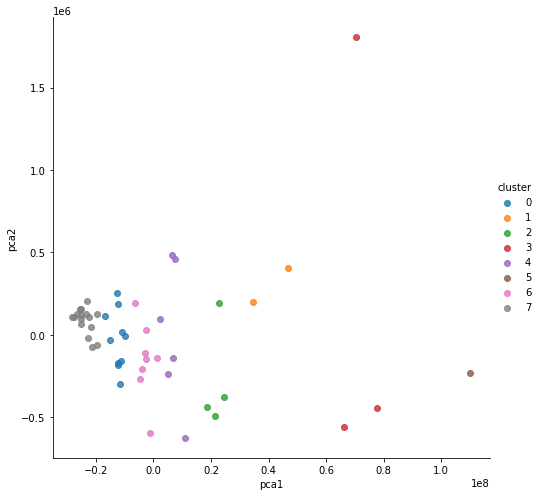

In [367]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1.2917177670149514e+16
Obj. Func: 5589844531312954.0
Obj. Func: 3061708944750526.5
Obj. Func: 1943962375357914.5
Obj. Func: 1123416073724226.4
Obj. Func: 650780773468784.5
Obj. Func: 374890862300220.1
Obj. Func: 303513011627755.9
Obj. Func: 231315403920171.97


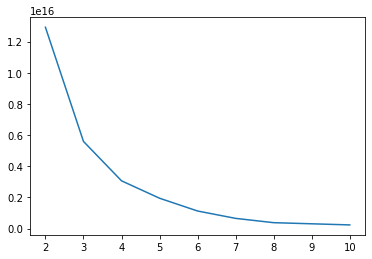

In [368]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(stats2018.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

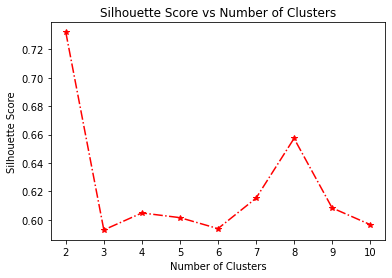

In [369]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(stats2018.values) for k in k_range]
sscores = [silhouette_score(stats2018.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

The number of clusters consistenly is showing to be appropriately 8

In [370]:
clusterResults2018 = pd.concat([kmeans_3, stats2018], axis=1, join='outer')
clusterResults2018['Normalized_Death_Rate'] = normDR2018
clusterResults2018['Num Deaths'] = numdeaths2018
clusterResults2018['State'] = state_list

In [372]:
clusterResults2018.groupby(["cluster", "State", "Num Deaths"]).mean()

pca1          pca2    Year  \
cluster State          Num Deaths                                       
0       Arkansas       444        -1.131542e+07 -1.570382e+05  2018.0   
        Colorado       995        -1.219845e+07 -1.845673e+05  2018.0   
        Connecticut    1,069      -1.256200e+07  2.542124e+05  2018.0   
        Iowa           287        -1.248498e+07  1.856949e+05  2018.0   
        Kansas         345        -1.526048e+07 -3.134534e+04  2018.0   
        Maryland       2,324      -9.902636e+06 -7.264867e+03  2018.0   
        Mississippi    310        -1.109878e+07  1.980730e+04  2018.0   
        Oklahoma       716        -1.155273e+07 -2.963284e+05  2018.0   
        Oregon         547        -1.225252e+07 -1.681641e+05  2018.0   
        West Virginia  856        -1.699897e+07  1.128850e+05  2018.0   
1       Ohio           3,980       3.471144e+07  1.968664e+05  2018.0   
        Pennsylvania   4,415       4.663395e+07  4.033524e+05  2018.0   
2       Georgia        1,404       1.877073e+07 -4.351393e+05  2018.0   
        Illinois       2,722       2.282079e+07  1.908509e+05  2018.0   
        Michigan       2,591       2.143951e+07 -4.940155e+05  2018.0   
        North Carolina 2,259       2.438742e+07 -3.733644e+05  2018.0   
3       Florida        4,698       7.779835e+07 -4.402842e+05  2018.0   
        New York       3,697       7.055805e+07  1.803860e+06  2018.0   
        Texas          3,005       6.627239e+07 -5.592250e+05  2018.0   
4       Indiana        1,629       4.905754e+06 -2.339509e+05  2018.0   
        Massachusetts  2,241       6.331755e+06  4.848939e+05  2018.0   
        Missouri       1,610       6.632655e+06 -1.409589e+05  2018.0   
        New Jersey     2,900       7.627143e+06  4.628903e+05  2018.0   
        Tennessee      1,823       1.090573e+07 -6.235621e+05  2018.0   
        Virginia       1,448       2.128111e+06  9.494313e+04  2018.0   
5       California     5,348       1.101424e+08 -2.316403e+05  2018.0   
6       Alabama        775        -1.226817e+06 -5.943512e+05  2018.0   
        Arizona        1,670      -4.060330e+06 -2.047260e+05  2018.0   
        Kentucky       1,315       1.091349e+06 -1.399503e+05  2018.0   
        Louisiana      1,140      -2.635268e+06 -1.435096e+05  2018.0   
        Minnesota      636        -6.257047e+06  1.930498e+05  2018.0   
        South Carolina 1,125      -2.826424e+06 -1.083868e+05  2018.0   
        Washington     1,164      -4.631461e+06 -2.667087e+05  2018.0   
        Wisconsin      1,079      -2.649879e+06  3.004804e+04  2018.0   
7       Alaska         110        -2.814780e+07  1.066581e+05  2018.0   
        Delaware       401        -2.519080e+07  9.833163e+04  2018.0   
        Hawaii         213        -2.535352e+07  1.547346e+05  2018.0   
        Idaho          250        -2.287307e+07 -1.790436e+04  2018.0   
        Maine          345        -2.242090e+07  1.067076e+05  2018.0   
        Montana        125        -2.501734e+07  6.388461e+04  2018.0   
        Nebraska       138        -1.967148e+07  1.280060e+05  2018.0   
        Nevada         688        -1.973243e+07 -6.336501e+04  2018.0   
        New Hampshire  452        -2.346834e+07  1.257591e+05  2018.0   
        New Mexico     537        -2.185700e+07  5.091673e+04  2018.0   
        North Dakota   70         -2.557195e+07  1.545003e+05  2018.0   
        Rhode Island   317        -2.323435e+07  2.086931e+05  2018.0   
        South Dakota   57         -2.503917e+07  1.232461e+05  2018.0   
        Utah           624        -2.146864e+07 -7.081777e+04  2018.0   
        Vermont        153        -2.669005e+07  1.244032e+05  2018.0   
        Wyoming        66         -2.750651e+07  1.073731e+05  2018.0   

                                   Tot_Prscrbrs  Tot_Opioid_Prscrbrs  \
cluster State          Num Deaths                                      
0       Arkansas       444               9346.0               7116.0   
        Colorado       995    

In [374]:
clusterResults2018.groupby(["cluster", "State", "Normalized_Death_Rate"]).mean()

pca1          pca2  \
cluster State          Normalized_Death_Rate                               
0       Arkansas       14.752139             -1.131542e+07 -1.570382e+05   
        Colorado       17.482865             -1.219845e+07 -1.845673e+05   
        Connecticut    29.931234             -1.256200e+07  2.542124e+05   
        Iowa           4.286463              -1.248498e+07  1.856949e+05   
        Kansas         10.957188             -1.526048e+07 -3.134534e+04   
        Maryland       173.554972            -9.902636e+06 -7.264867e+03   
        Mississippi    5.529544              -1.109878e+07  1.980730e+04   
        Oklahoma       6.132058              -1.155273e+07 -2.963284e+05   
        Oregon         13.882421             -1.225252e+07 -1.681641e+05   
        West Virginia  11.377125             -1.699897e+07  1.128850e+05   
1       Ohio           525.010553             3.471144e+07  1.968664e+05   
        Pennsylvania   105.574375             4.663395e+07  4.033524e+05   
2       Georgia        6.608826               1.877073e+07 -4.351393e+05   
        Illinois       155.495231             2.282079e+07  1.908509e+05   
        Michigan       37.645466              2.143951e+07 -4.940155e+05   
        North Carolina 11.566612              2.438742e+07 -3.733644e+05   
3       Florida        669.662902             7.779835e+07 -4.402842e+05   
        New York       176.658268             7.055805e+07  1.803860e+06   
        Texas          44.376311              6.627239e+07 -5.592250e+05   
4       Indiana        12.803513              4.905754e+06 -2.339509e+05   
        Massachusetts  37.128455              6.331755e+06  4.848939e+05   
        Missouri       54.008360              6.632655e+06 -1.409589e+05   
        New Jersey     214.264868             7.627143e+06  4.628903e+05   
        Tennessee      207.466046             1.090573e+07 -6.235621e+05   
        Virginia       231.918226             2.128111e+06  9.494313e+04   
5       California     13.552420              1.101424e+08 -2.316403e+05   
6       Alabama        15.856190             -1.226817e+06 -5.943512e+05   
        Arizona        23.330461             -4.060330e+06 -2.047260e+05   
        Kentucky       45.167910              1.091349e+06 -1.399503e+05   
        Louisiana      25.553932             -2.635268e+06 -1.435096e+05   
        Minnesota      6.370146              -6.257047e+06  1.930498e+05   
        South Carolina 106.303867            -2.826424e+06 -1.083868e+05   
        Washington     13.692046             -4.631461e+06 -2.667087e+05   
        Wisconsin      59.801883             -2.649879e+06  3.004804e+04   
7       Alaska         14.963157             -2.814780e+07  1.066581e+05   
        Delaware       41.533788             -2.519080e+07  9.833163e+04   
        Hawaii         2.026423              -2.535352e+07  1.547346e+05   
        Idaho          17.598285             -2.287307e+07 -1.790436e+04   
        Maine          7.403926              -2.242090e+07  1.067076e+05   
        Montana        2.041942              -2.501734e+07  6.388461e+04   
        Nebraska       13.010706             -1.967148e+07  1.280060e+05   
        Nevada         35.728864             -1.973243e+07 -6.336501e+04   
        New Hampshire  14.930594             -2.346834e+07  1.257591e+05   
        New Mexico     6.043197              -2.185700e+07  5.091673e+04   
        North Dakota   0.674269              -2.557195e+07  1.545003e+05   
        Rhode Island   2.476384              -2.323435e+07  2.086931e+05   
        South Dakota   1.121130              -2.503917e+07  1.232461e+05   
        Utah           2.179634              -2.146864e+07 -7.081777e+04   
        Vermont        4.851675              -2.669005e+07  1.244032e+05   
        Wyoming        1.136480              -2.750651e+07  1.073731e+05   

                                                Year  Tot_Prscrbrs  \
cluster State          Normaliz

### Discussion
It appears that these parameters actually form the same clusters as they did in the previous year. And it seems to still not be a good predictor of death rate but an ok predictor of number of deaths. 

In [453]:
stats2018.columns

Index(['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2018_age_adjusted_rate',
       'Normalized_Long-Acting_Rate', 'Normalized_Tot_Opioid_Clms',
       'Source Year', 'SmokingValue', 'UnemploymentValue',
       'FreqPhysDistressValue', 'ExcessiveDrinkingValue', 'EducationLTHSValue',
       'ECigValue', 'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [456]:
smaller2018 = stats2018
normLA2018 = stats2018['Normalized_Long-Acting_Rate']
normTotClms2018 = stats2018['Normalized_Tot_Opioid_Clms']
#smaller2018 = smaller2018.drop(columns=['state', 'Year', 'state.1', 'Breakout_Type', 'Breakout', 'range_category', 'Prscrbr_Geo_Lvl', 'RUCA_Cd', 'Prscrbr_Geo_Cd', 'Opioid_Prscrbng_Rate_5Y_Chg', 'LA_Opioid_Prscrbng_Rate_5Y_Chg', '2017_num_deaths', 'Normalized_Death_Rate'])
#smaller2017 = small2017.replace(',','', regex=True)

smaller2018 = smaller2018.drop(columns=['Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms', 'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg', 'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate_1Y_Chg', 'Normalized_Tot_Opioid_Clms', 'Normalized_Long-Acting_Rate', '2018_age_adjusted_rate', 'Year', 'Source Year'])

In [457]:
smaller2018.columns

Index(['SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [466]:
kmeans = KMeans(n_clusters=5).fit(smaller2018.values)
print(kmeans, "\n")

KMeans(n_clusters=5) 



In [467]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [468]:
pca = PCA(n_components=2).fit(smaller2018)
# Perform the transform
pca_trans = pca.transform(smaller2018)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
4,1,-4.778580,1.629300
32,2,1.481974,-0.345544
19,1,-5.700166,3.913160
0,0,8.476703,3.275705
9,1,-0.686361,0.908504


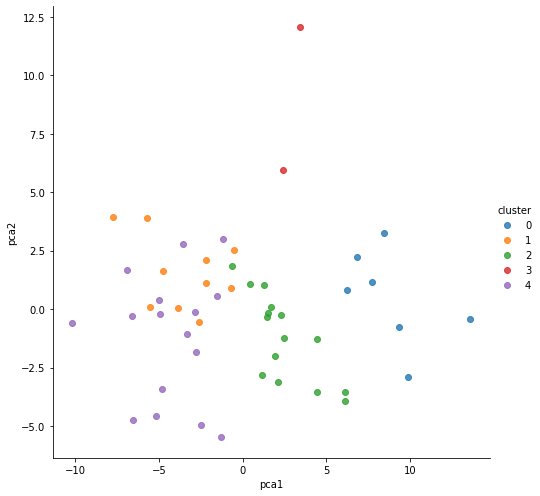

In [469]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1667.4041919146734
Obj. Func: 1412.4570931002277
Obj. Func: 1191.2883272300398
Obj. Func: 1013.4140245310246
Obj. Func: 886.8633859984325
Obj. Func: 799.6424722467177
Obj. Func: 725.6729788910933
Obj. Func: 670.7283391704744
Obj. Func: 621.8571006944444


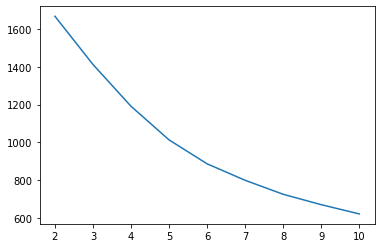

In [470]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smaller2018.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

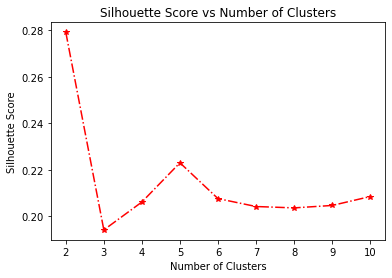

In [471]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smaller2018.values) for k in k_range]
sscores = [silhouette_score(smaller2018.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [472]:
clusterResults2018smaller = pd.concat([kmeans_3, smaller2018], axis=1, join='outer')
clusterResults2018smaller['Normalized_Death_Rate'] = normDR2018
clusterResults2018smaller['Num Deaths'] = numdeaths2018
clusterResults2018smaller['State'] = state_list

In [473]:
clusterResults2018smaller.groupby(["cluster", "State", "Num Deaths"]).mean()

pca1       pca2  SmokingValue  \
cluster State          Num Deaths                                       
0       Alabama        775          8.476703   3.275705          19.2   
        Kentucky       1,315        9.893322  -2.885724          23.4   
        Mississippi    310          6.216938   0.836391          20.5   
        Oklahoma       716          7.709600   1.152604          19.7   
        Oregon         547          6.858767   2.233896          15.6   
        Tennessee      1,823        9.375404  -0.744617          20.7   
        West Virginia  856         13.606103  -0.405657          25.2   
1       Arizona        1,670       -2.166513   1.118122          14.0   
        California     5,348       -4.778580   1.629300          11.2   
        Florida        4,698       -3.881527   0.036680          14.5   
        Georgia        1,404       -0.686361   0.908504          16.1   
        Maryland       2,324       -5.700166   3.913160          12.5   
        Nevada         688         -2.172459   2.121012          15.7   
        New Jersey     2,900       -7.713219   3.931783          13.1   
        New Mexico     537         -0.509281   2.537413          15.2   
        New York       3,697       -5.526415   0.085043          12.8   
        Texas          3,005       -2.585706  -0.554515          14.4   
2       Alaska         110          1.165265  -2.820542          19.1   
        Arkansas       444          6.114589  -3.933305          22.7   
        Indiana        1,629        2.101206  -3.122361          21.1   
        Kansas         345          1.278639   1.027662          17.2   
        Louisiana      1,140        6.094111  -3.548787          20.5   
        Maine          345          2.485064  -1.217235          17.8   
        Michigan       2,591        4.460680  -1.281483          18.9   
        Missouri       1,610        4.460889  -3.543505          19.4   
        Montana        125          1.531044  -0.183603          18.0   
        North Carolina 2,259        1.481974  -0.345544          17.4   
        Ohio           3,980        1.946931  -1.991735          20.5   
        Pennsylvania   4,415        1.671701   0.080429          17.0   
        Rhode Island   317          0.436685   1.092765          14.6   
        South Carolina 1,125        2.299003  -0.259527          18.0   
        Vermont        153         -0.613754   1.836255          13.7   
3       Utah           624          3.417493  12.067307           9.0   
        Washington     1,164        2.399982   5.930679          12.0   
4       Colorado       995         -6.622279  -0.311259          14.5   
        Connecticut    1,069       -6.930814   1.654380          12.2   
        Delaware       401         -3.306165  -1.053417          16.5   
        Hawaii         213        -10.160273  -0.613057          13.4   
        Idaho          250         -1.180938   2.985669          14.7   
        Illinois       2,722       -2.862472  -0.142395          15.5   
        Iowa           287         -6.528802  -4.742118          16.6   
        Massachusetts  2,241       -4.965664   0.400958          13.4   
        Minnesota      636         -4.917046  -0.209628          15.1   
        Nebraska       138         -4.840420  -3.417552          16.0   
        New Hampshire  452         -1.518423   0.551881          15.6   
        North Dakota   70          -1.305551  -5.478521          19.1   
        South Dakota   57          -5.194010  -4.589072          19.0   
        Virginia       1,448       -3.538600   2.782199          14.9   
        Wisconsin      1,079       -2.484637  -4.946301          16.4   
        Wyoming        66          -2.792020  -1.848338          18.8   

                                   UnemploymentValue  FreqPhysDistressValue  \
cluster State          Num Deaths                                             
0       Alabama        775                       7.0                   15.1   
      

### Discussion
It seems the predictors did a better job at organizing the results based by the number of deaths this time around. There were also fewer clusters where the first cluster had very low values generally for the number of deaths, the second cluster was the one that had very high number of deaths (but didn't include Ohio or Pennsylvania). The last cluster was all very low in the death numbers as well except had a few outliers. There was also a small cluster that only had Utah and COlorade for some reason but they are very close in the number of deaths as well. 

### Minimizing the predictors again

In [540]:
smallest2018 = smaller2018
smallest2018.columns

Index(['SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [541]:
smallest2018 = smallest2018.drop(columns=['CancerValue', 'ECigValue', 'Depression65UpValue'])

In [542]:
smallest2018.columns

Index(['SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'DepressionValue'],
      dtype='object')

In [563]:
kmeans = KMeans(n_clusters=7).fit(smallest2018.values)

In [564]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [565]:
pca = PCA(n_components=2).fit(smallest2018)
# Perform the transform
pca_trans = pca.transform(smallest2018)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
28,2,-0.485622,1.419746
39,4,1.832178,-0.440503
3,1,7.628545,-2.023078
33,0,-0.775476,-5.992032
38,2,-0.300906,0.277734


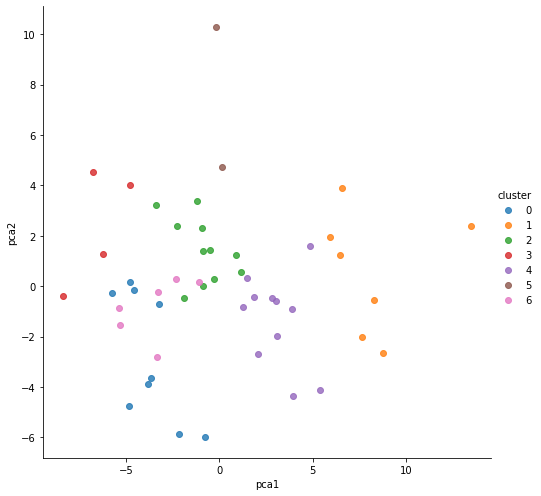

In [566]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1416.5901666666666
Obj. Func: 1157.7635154061622
Obj. Func: 961.6076103896103
Obj. Func: 851.7565303030301
Obj. Func: 727.6315764790766
Obj. Func: 622.5710317460317
Obj. Func: 564.6865
Obj. Func: 500.9225714285716
Obj. Func: 446.89611904761904


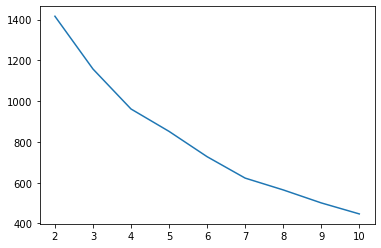

In [567]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smallest2018.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

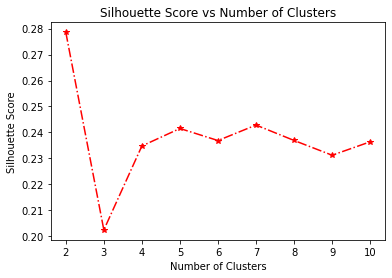

In [568]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smallest2018.values) for k in k_range]
sscores = [silhouette_score(smallest2018.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [569]:
clusterResults2018smallest = pd.concat([kmeans_3, smallest2018], axis=1, join='outer')
clusterResults2018smallest['Normalized_Death_Rate'] = normDR2018
clusterResults2018smallest['Num Deaths'] = numdeaths2018
clusterResults2018smallest['State'] = state_list

In [570]:
clusterResults2018smallest.groupby(["cluster", "State", "Num Deaths"]).mean()

pca1       pca2  SmokingValue  \
cluster State          Num Deaths                                       
0       Colorado       995         -5.759023  -0.277829          14.5   
        Illinois       2,722       -3.228141  -0.690054          15.5   
        Iowa           287         -4.836107  -4.752788          16.6   
        Massachusetts  2,241       -4.794862   0.182898          13.4   
        Minnesota      636         -4.589405  -0.155105          15.1   
        Nebraska       138         -3.845426  -3.870981          16.0   
        North Dakota   70          -0.775476  -5.992032          19.1   
        South Dakota   57          -3.681840  -3.643158          19.0   
        Wisconsin      1,079       -2.179577  -5.862845          16.4   
1       Alabama        775          6.578523   3.881119          19.2   
        Arkansas       444          7.628545  -2.023078          22.7   
        Kentucky       1,315        8.749901  -2.648821          23.4   
        Mississippi    310          5.939313   1.962027          20.5   
        Oklahoma       716          6.456595   1.256987          19.7   
        Tennessee      1,823        8.269175  -0.550713          20.7   
        West Virginia  856         13.454710   2.387444          25.2   
2       Delaware       401         -1.917722  -0.459818          16.5   
        Idaho          250         -1.221179   3.371297          14.7   
        Kansas         345          0.909654   1.236369          17.2   
        Montana        125          1.171603   0.548396          18.0   
        Nevada         688         -2.289246   2.406931          15.7   
        New Hampshire  452         -0.485622   1.419746          15.6   
        New Mexico     537         -0.921444   2.308002          15.2   
        Rhode Island   317         -0.300906   0.277734          14.6   
        Vermont        153         -0.902554   1.408444          13.7   
        Virginia       1,448       -3.378338   3.223783          14.9   
        Wyoming        66          -0.881078  -0.010322          18.8   
3       Connecticut    1,069       -6.240321   1.296583          12.2   
        Hawaii         213         -8.357053  -0.370883          13.4   
        Maryland       2,324       -4.788081   4.008275          12.5   
        New Jersey     2,900       -6.766311   4.513210          13.1   
4       Alaska         110          2.058589  -2.673622          19.1   
        Indiana        1,629        3.089403  -1.972482          21.1   
        Louisiana      1,140        5.411057  -4.115213          20.5   
        Maine          345          2.811051  -0.474729          17.8   
        Michigan       2,591        3.898333  -0.900091          18.9   
        Missouri       1,610        3.922762  -4.343829          19.4   
        North Carolina 2,259        1.264326  -0.832033          17.4   
        Ohio           3,980        3.017257  -0.575270          20.5   
        Oregon         547          4.846656   1.606181          15.6   
        Pennsylvania   4,415        1.503992   0.339565          17.0   
        South Carolina 1,125        1.832178  -0.440503          18.0   
5       Utah           624         -0.159769  10.287462           9.0   
        Washington     1,164        0.155579   4.728364          12.0   
6       Arizona        1,670       -2.320407   0.269990          14.0   
        California     5,348       -5.350584  -0.854437          11.2   
        Florida        4,698       -3.273306  -0.229857          14.5   
        Georgia        1,404       -1.082772   0.154585          16.1   
        New York       3,697       -5.316809  -1.538498          12.8   
        Texas          3,005       -3.325843  -2.816402          14.4   

                                   UnemploymentValue  FreqPhysDistressValue  \
cluster State          Num Deaths                                             
0       Colorado       995                       4.0                    9.8   
      

### Discussion 
It seems like maybe for the 2018 data these clusters did an ok job at predicting a death number. It seems that they're all generally pretty similar with some obvious outliers. 

# 2019 Data Clustering

In [534]:
stats2019 = pd.read_csv("totals2019.csv")
normDR2019 = stats2019['Normalized_Death_Rate']
numDeaths2019 = stats2019['2019 Number of Deaths']
stats2019.columns

Index(['Unnamed: 0', 'state', 'Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs',
       'Tot_Opioid_Clms', 'Tot_Clms', 'Opioid_Prscrbng_Rate',
       'Opioid_Prscrbng_Rate_1Y_Chg', 'LA_Tot_Opioid_Clms',
       'LA_Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate_1Y_Chg',
       'Range Category', '2019 Age-adjusted Rate', '2019 Number of Deaths',
       'Normalized_Death_Rate', 'Normalized_Long-Acting_Rate',
       'Normalized_Tot_Opioid_Clms', 'State Name', 'SmokingValue',
       'UnemploymentValue', 'FreqPhysDistressValue', 'ExcessiveDrinkingValue',
       'EducationLTHSValue', 'ECigValue', 'Depression65UpValue',
       'DepressionValue', 'CancerValue'],
      dtype='object')

In [590]:
#Dropping these columns since they're non numerical or useless
stats2019 = stats2019.drop(columns=['state', 'Unnamed: 0', 'Range Category', 'State Name', '2019 Number of Deaths', 'Normalized_Death_Rate', 'Normalized_Long-Acting_Rate'])

In [591]:
stats2019 = stats2019.replace(',','', regex=True)

In [592]:
#Deal with missing values by replacing the dew NaN with mean
stats2019['ECigValue'].fillna(value=stats2019['ECigValue'].mean(), inplace=True)

In [599]:
kmeans = KMeans(n_clusters=8).fit(stats2019.values)
print(kmeans, "\n")

KMeans() 



In [600]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [601]:
pca = PCA(n_components=2).fit(stats2019)
# Perform the transform
pca_trans = pca.transform(stats2019)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
30,2,-2.181603e+07,57929.218558
35,6,-1.150406e+07,-224571.731627
39,1,-2.699907e+06,-86169.446942
20,7,5.501347e+06,400340.250849
40,2,-2.506658e+07,126685.258629


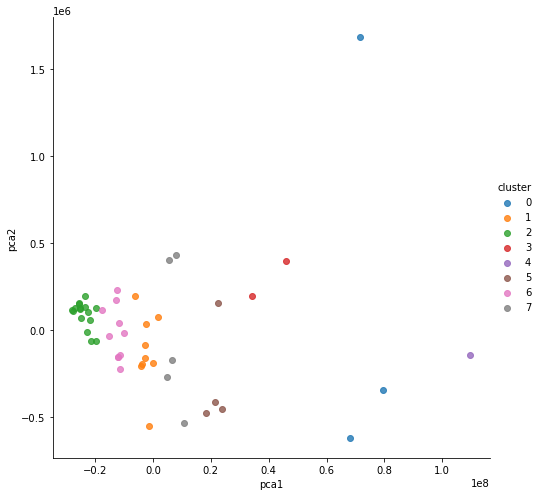

In [602]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1.2830029034240906e+16
Obj. Func: 5503522378920721.0
Obj. Func: 2910375426175974.5
Obj. Func: 2012713742458841.0
Obj. Func: 1108503691651015.1
Obj. Func: 640434867710866.4
Obj. Func: 367180492324388.1
Obj. Func: 286514531765823.94
Obj. Func: 215313327566564.1


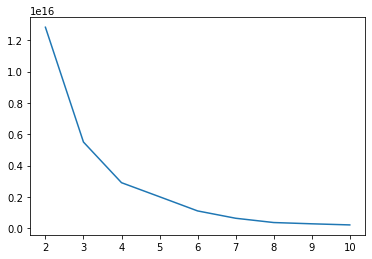

In [603]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(stats2019.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

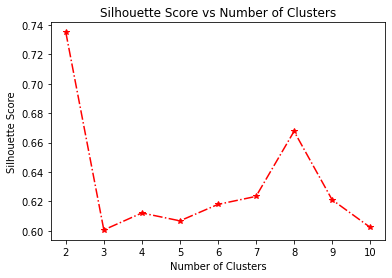

In [604]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(stats2019.values) for k in k_range]
sscores = [silhouette_score(stats2019.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [605]:
clusterResults2019 = pd.concat([kmeans_3, stats2019], axis=1, join='outer')
clusterResults2019['Normalized_Death_Rate'] = normDR2019
clusterResults2019['NumDeaths'] = numDeaths2019
clusterResults2019['State'] = state_list
clusterResults2019.groupby(["cluster", "State", "NumDeaths"]).mean()

pca1          pca2    Year  \
cluster State          NumDeaths                                       
0       Florida        5268.0     7.957131e+07 -3.448444e+05  2019.0   
        New York       3617.0     7.155407e+07  1.682156e+06  2019.0   
        Texas          3136.0     6.806359e+07 -6.202876e+05  2019.0   
1       Alabama        768.0     -1.372200e+06 -5.536305e+05  2019.0   
        Arizona        1907.0    -3.702881e+06 -1.972306e+05  2019.0   
        Kentucky       1380.0     1.894139e+05 -1.881462e+05  2019.0   
        Louisiana      1267.0    -2.818045e+06 -1.636270e+05  2019.0   
        Minnesota      792.0     -6.069951e+06  1.930045e+05  2019.0   
        South Carolina 1127.0    -2.699907e+06 -8.616945e+04  2019.0   
        Virginia       1547.0     1.773346e+06  7.272589e+04  2019.0   
        Washington     1259.0    -4.214358e+06 -2.086967e+05  2019.0   
        Wisconsin      1201.0    -2.440154e+06  3.325371e+04  2019.0   
2       Alaska         132.0     -2.779013e+07  1.133647e+05  2019.0   
        Delaware       435.0     -2.513272e+07  1.189209e+05  2019.0   
        Hawaii         242.0     -2.545878e+07  1.495604e+05  2019.0   
        Idaho          265.0     -2.265620e+07 -1.098415e+04  2019.0   
        Maine          371.0     -2.247421e+07  1.018846e+05  2019.0   
        Montana        143.0     -2.496240e+07  6.749926e+04  2019.0   
        Nebraska       161.0     -1.973125e+07  1.265141e+05  2019.0   
        Nevada         647.0     -1.958987e+07 -6.461762e+04  2019.0   
        New Hampshire  407.0     -2.345959e+07  1.291852e+05  2019.0   
        New Mexico     599.0     -2.181603e+07  5.792922e+04  2019.0   
        North Dakota   82.0      -2.560290e+07  1.526707e+05  2019.0   
        Rhode Island   307.0     -2.348453e+07  1.976417e+05  2019.0   
        South Dakota   86.0      -2.506658e+07  1.266853e+05  2019.0   
        Utah           571.0     -2.132733e+07 -6.537930e+04  2019.0   
        Vermont        133.0     -2.674357e+07  1.261986e+05  2019.0   
        Wyoming        79.0      -2.757458e+07  1.109297e+05  2019.0   
3       Ohio           4251.0     3.431415e+07  1.971081e+05  2019.0   
        Pennsylvania   4377.0     4.614490e+07  3.989516e+05  2019.0   
4       California     6198.0     1.096664e+08 -1.425295e+05  2019.0   
5       Georgia        1408.0     1.824702e+07 -4.771716e+05  2019.0   
        Illinois       2790.0     2.254467e+07  1.539333e+05  2019.0   
        Michigan       2385.0     2.150124e+07 -4.138664e+05  2019.0   
        North Carolina 2266.0     2.371758e+07 -4.531900e+05  2019.0   
6       Arkansas       388.0     -1.151100e+07 -1.462669e+05  2019.0   
        Colorado       1079.0    -1.200201e+07 -1.582248e+05  2019.0   
        Connecticut    1214.0    -1.254713e+07  2.308911e+05  2019.0   
        Iowa           352.0     -1.258229e+07  1.734813e+05  2019.0   
        Kansas         403.0     -1.532459e+07 -3.360136e+04  2019.0   
        Maryland       2369.0    -9.814510e+06 -1.731096e+04  2019.0   
        Mississippi    394.0     -1.170333e+07  4.090915e+04  2019.0   
        Oklahoma       645.0     -1.150406e+07 -2.245717e+05  2019.0   
        Oregon         615.0     -1.207164e+07 -1.556032e+05  2019.0   
        West Virginia  870.0     -1.748616e+07  1.169177e+05  2019.0   
7       Indiana        1699.0     4.722864e+06 -2.728295e+05  2019.0   
        Massachusetts  2210.0     5.501347e+06  4.003403e+05  2019.0   
        Missouri       1583.0     6.482035e+06 -1.701665e+05  2019.0   
        New Jersey     2805.0     8.048492e+06  4.290471e+05  2019.0   
        Tennessee      2089.0     1.069245e+07 -5.327578e+05  2019.0   

                                  Tot_Prscrbrs  Tot_Opioid_Prscrbrs  \
cluster State          NumDeaths                                      
0       Florida        5268.0          78483.0              45389.0   
        New York       3617.0          96669.0              51745.0   
        Texas

### Lowering the predictors

In [520]:
smallest2019 = stats2019
smallest2019.columns

Index(['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2019 Age-adjusted Rate',
       '2019 Number of Deaths', 'Normalized_Death_Rate',
       'Normalized_Long-Acting_Rate', 'Normalized_Tot_Opioid_Clms',
       'SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [521]:
smallest2019 = smallest2019.drop(columns=['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms', 'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg', 'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate_1Y_Chg', 'Normalized_Tot_Opioid_Clms', 'Normalized_Long-Acting_Rate', '2019 Age-adjusted Rate', 'Year', '2019 Number of Deaths'])

In [522]:
smallest2019=smallest2019.drop(columns=['Normalized_Death_Rate', 'ECigValue', 'Depression65UpValue'])

In [583]:
kmeans = KMeans(n_clusters=6).fit(smallest2019.values)
print(kmeans, "\n")

KMeans(n_clusters=6) 



In [584]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [585]:
pca = PCA(n_components=2).fit(smallest2019)
# Perform the transform
pca_trans = pca.transform(smallest2019)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
0,1,7.482111,4.159458
20,0,-4.896664,2.385929
24,1,4.559847,-4.681570
8,3,-1.644439,-0.992690
11,4,1.267038,2.722050


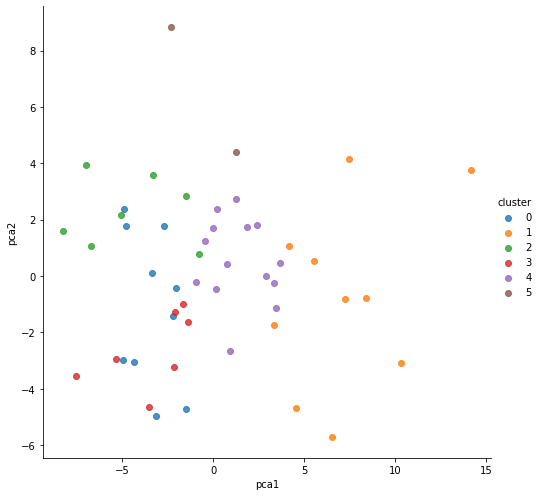

In [586]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1443.2956349206347
Obj. Func: 1157.3216098484847
Obj. Func: 994.2036720142602
Obj. Func: 891.8492142857142
Obj. Func: 789.1705079365079
Obj. Func: 674.2461309523812
Obj. Func: 623.4402359307358
Obj. Func: 540.6962261904763
Obj. Func: 488.2415833333335


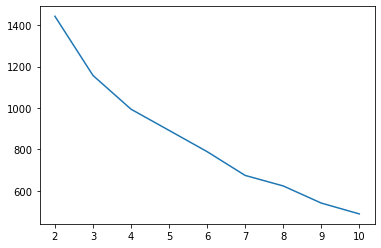

In [587]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smallest2019.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

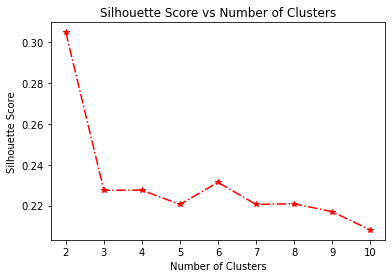

In [588]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smallest2019.values) for k in k_range]
sscores = [silhouette_score(smallest2019.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [589]:
clusterResults2019smallest = pd.concat([kmeans_3, smallest2019], axis=1, join='outer')
clusterResults2019smallest['Normalized_Death_Rate'] = normDR2019
clusterResults2019smallest['Num Deaths'] = numDeaths2019
clusterResults2019smallest['State'] = state_list
clusterResults2019smallest.groupby(["cluster", "State", "Num Deaths"]).mean()

pca1      pca2  SmokingValue  \
cluster State          Num Deaths                                      
0       Colorado       1079.0      -4.799181  1.774686          13.5   
        Illinois       2790.0      -3.368815  0.107028          14.5   
        Iowa           352.0       -4.356714 -3.035568          16.4   
        Massachusetts  2210.0      -4.896664  2.385929          12.0   
        Minnesota      792.0       -2.727418  1.793660          14.6   
        Nebraska       161.0       -4.963552 -2.993395          14.7   
        North Dakota   82.0        -3.153366 -4.956485          17.0   
        Rhode Island   307.0       -2.028348 -0.419291          13.3   
        South Dakota   86.0        -2.223221 -1.406154          18.3   
        Wisconsin      1201.0      -1.506611 -4.710615          15.4   
1       Alabama        768.0        7.482111  4.159458          20.2   
        Arkansas       388.0        8.429404 -0.769009          20.2   
        Kentucky       1380.0      10.354452 -3.071185          23.6   
        Louisiana      1267.0       6.556934 -5.723939          21.9   
        Mississippi    394.0        4.150453  1.055462          20.4   
        Missouri       1583.0       4.559847 -4.681570          19.6   
        North Carolina 2266.0       3.341662 -1.730207          18.5   
        Oklahoma       645.0        5.573785  0.519456          18.9   
        Tennessee      2089.0       7.235898 -0.812177          19.9   
        West Virginia  870.0       14.161875  3.751328          23.8   
2       Connecticut    1214.0      -6.693531  1.070532          12.1   
        Hawaii         242.0       -8.237659  1.585991          12.3   
        Maryland       2369.0      -5.081683  2.177255          12.7   
        Nevada         647.0       -1.485925  2.850729          15.7   
        New Jersey     2805.0      -7.003987  3.936809          13.1   
        New Mexico     599.0       -0.776814  0.799456          16.0   
        Virginia       1547.0      -3.327320  3.594413          14.0   
3       Alaska         132.0       -2.142291 -3.245999          17.4   
        Arizona        1907.0      -2.112746 -1.266692          14.9   
        California     6198.0      -7.554455 -3.531327          10.0   
        Florida        5268.0      -1.644439 -0.992690          14.8   
        Georgia        1408.0      -1.390983 -1.642335          16.3   
        New York       3617.0      -5.351276 -2.929508          12.7   
        Texas          3136.0      -3.551479 -4.637153          14.7   
4       Delaware       435.0       -0.958942 -0.212150          15.9   
        Idaho          265.0        1.267038  2.722050          15.3   
        Indiana        1699.0       3.365600 -0.249573          19.2   
        Kansas         403.0       -0.466526  1.239200          16.2   
        Maine          371.0        3.657380  0.445206          17.6   
        Michigan       2385.0       2.908016 -0.006811          18.7   
        Montana        143.0        2.440298  1.825052          16.6   
        New Hampshire  407.0        0.006071  1.696944          15.9   
        Ohio           4251.0       3.445301 -1.132064          20.8   
        Oregon         615.0        1.838829  1.728373          14.5   
        Pennsylvania   4377.0       0.736851  0.435321          17.3   
        South Carolina 1127.0       0.930483 -2.651708          17.5   
        Vermont        133.0        0.142182 -0.464399          15.1   
        Wyoming        79.0         0.238584  2.363215          18.4   
5       Utah           571.0       -2.293192  8.842821           7.9   
        Washington     1259.0       1.274083  4.411632          12.6   

                                   UnemploymentValue  FreqPhysDistressValue  \
cluster State          Num Deaths                                             
0       Colorado       1079.0                    3.7                   10.0   
        Illinois       2790.0                    3.4      

# Discussion about Results

It seems that the total number of prescriptions written and given had the largest impact on predicting the number of deaths from an overdose at the state level. Using prescriptions as predictors organized the states by very large death rates, to very low death rates. Using the predictors from the United Health Foundation resulted in a high variance in a smaller amount of clusters in terms of the number of deaths. 

# Conclusions
It would seem that the amount of Opioid Prescriptions given out combined with the predictors does an OK job at predicting the number of deaths that will happen in a year.